In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = pd.read_csv('https://raw.githubusercontent.com/aydanomachado/mlclass/master/01_Preprocessing/diabetes_dataset.csv')

data.head()


 - Lendo o arquivo com o dataset sobre diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [2]:
print('\n', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               572 non-null    int64  
 1   Glucose                   567 non-null    float64
 2   BloodPressure             537 non-null    float64
 3   SkinThickness             345 non-null    float64
 4   Insulin                   198 non-null    float64
 5   BMI                       561 non-null    float64
 6   DiabetesPedigreeFunction  572 non-null    float64
 7   Age                       572 non-null    int64  
 8   Outcome                   572 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.3 KB

 None


In [3]:
print(data.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


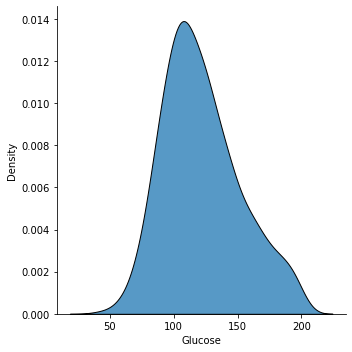

In [4]:
sns.displot(data, x="Glucose", kind="kde", multiple="stack")

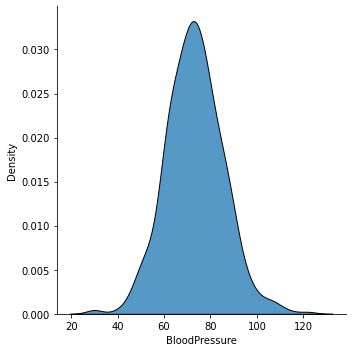

In [5]:
sns.displot(data, x="BloodPressure", kind="kde", multiple="stack")

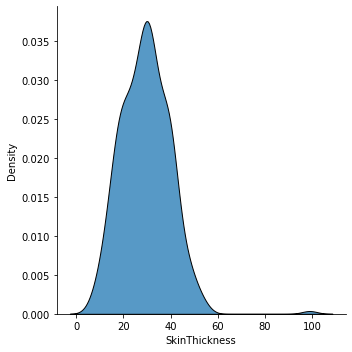

In [6]:
sns.displot(data, x="SkinThickness", kind="kde", multiple="stack")

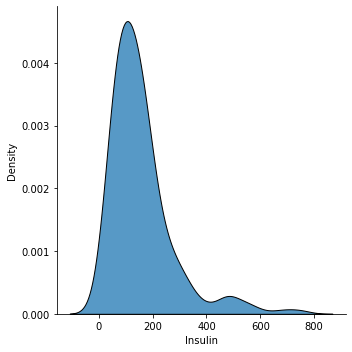

In [7]:
sns.displot(data, x="Insulin", kind="kde", multiple="stack")

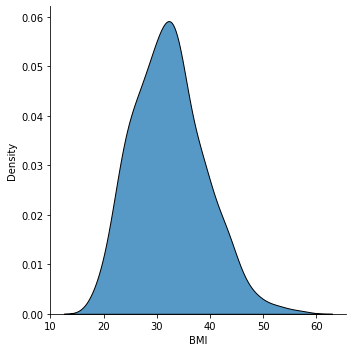

In [8]:
sns.displot(data, x="BMI", kind="kde", multiple="stack")

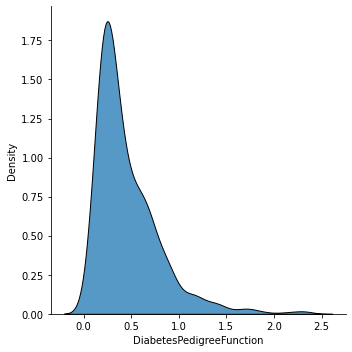

In [9]:
sns.displot(data, x="DiabetesPedigreeFunction", kind="kde", multiple="stack")

In [10]:
# Substituimos os valores nulos pela mediana

data['SkinThickness'].fillna(round(data['SkinThickness'].median(), 1), inplace = True)
data['Insulin'].fillna(round(data['Insulin'].median(), 1), inplace = True)

In [11]:
# Agora podemos excluir todas as linhas NA, sendo
# um total de 43 linhas, ou seja, somente 7% do dataset

data = data.dropna()

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,129.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,129.5,26.6,0.351,31,0
2,8,183.0,64.0,30.0,129.5,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,30.0,129.5,25.6,0.201,30,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               528 non-null    int64  
 1   Glucose                   528 non-null    float64
 2   BloodPressure             528 non-null    float64
 3   SkinThickness             528 non-null    float64
 4   Insulin                   528 non-null    float64
 5   BMI                       528 non-null    float64
 6   DiabetesPedigreeFunction  528 non-null    float64
 7   Age                       528 non-null    int64  
 8   Outcome                   528 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 41.2 KB


In [14]:
# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta alterar o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#leitura do arquivo de teste
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_excel('https://raw.githubusercontent.com/aydanomachado/mlclass/master/01_Preprocessing/diabetes_app.xlsx')

# Normalizar os dados para a mesma escala (pré-processamento)
scaler = MinMaxScaler()
data_app = pd.DataFrame(scaler.fit_transform(data_app))
data_app.columns = feature_cols
#data_app = data_app[feature_cols]

#criação da predição
y_pred = neigh.predict(data_app)

 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset
 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor


In [15]:
# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "MMs"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"MMs","accuracy":0.6581632653061225,"old_accuracy":0.65816326530612} 

